In [3]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import ecg_library_v1 as ecg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
X_pcl = ecg.unpickler("/scratch/thurasx/ptb_xl/all_waves_data.pcl")
y_pcl = ecg.unpickler("/scratch/thurasx/ptb_xl/reference_scp_list.pcl")

# print(y)
# v, counts = np.unique(np.array(y_pcl), return_counts=True)
# print(counts)
np.set_printoptions(threshold=np.inf)

pickle opening
pickle opening


(17116, 5000, 12)


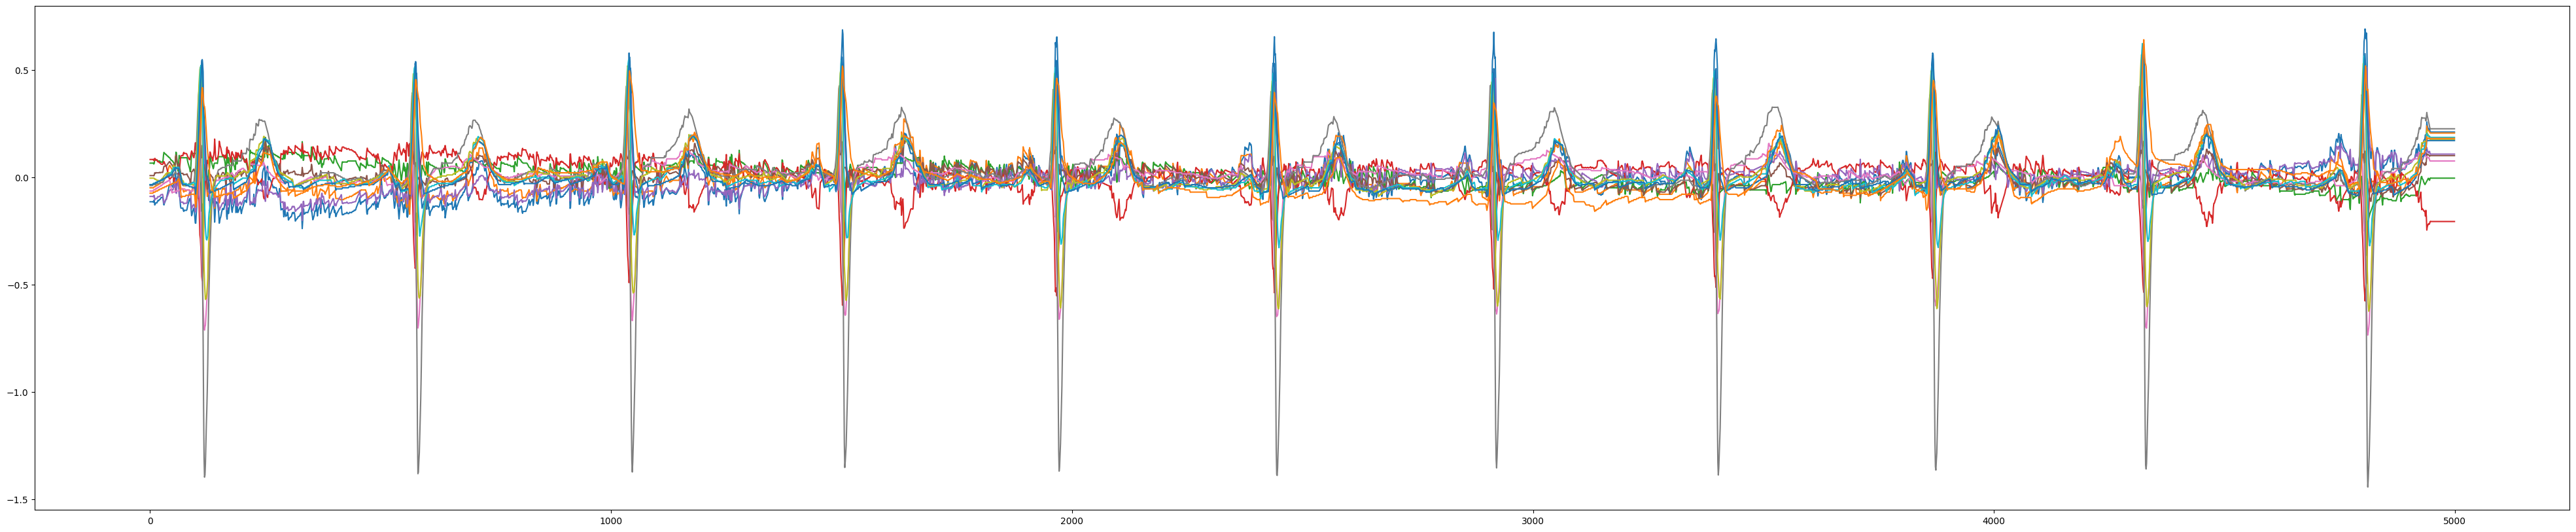

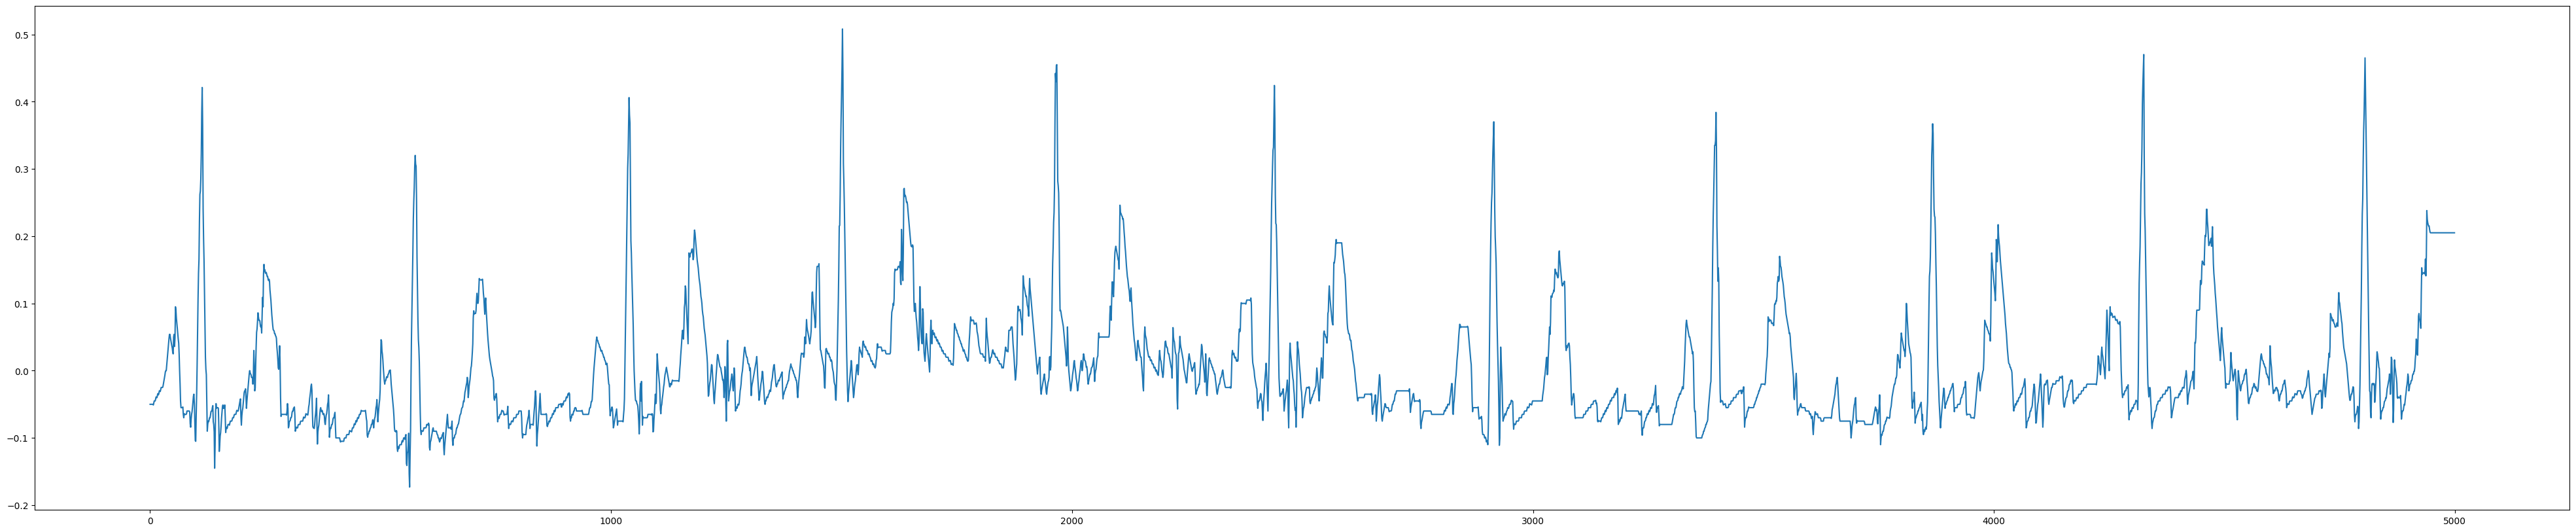

In [16]:
# tmp = unpickler("/scratch/thurasx/x1.pcl")
print(X_pcl.shape)
plt.figure(figsize=(50,10))
tmp = X_pcl[0]
plt.plot(tmp)
plt.show()

tmp2 = X_pcl[0,:,1]
plt.figure(figsize=(50,10))
plt.plot(tmp2)
# plt.savefig("test.png")
plt.show()

In [ ]:
X = []
for i in range(len(X_pcl)):
    tmp = X_pcl[i].flatten()
    X.append(tmp)
print("-----------")

y = []
for data in y_pcl:
    if data == "NORM":
        y.append(0)
    else:
        y.append(1)



In [9]:

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.33, random_state=42)

In [16]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
classifier.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=10)

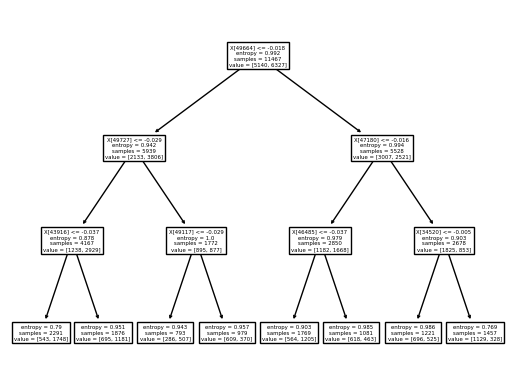

In [11]:

treeplot = tree.plot_tree(classifier)
plt.savefig("tree.png", dpi=300, bbox_inches='tight')

In [17]:

ecg.pickler(obj_save=classifier, filepath="/scratch/thurasx/decision_tree_classifier_10.pcl")
pred = classifier.predict(X_test)
# for i in range(len(pred)):
#     print(pred[i], y_test[i])
score = accuracy_score(pred, y_test, normalize=True)
print(score)

pickling
pickle done
0.6714462736767569
